In [5]:
!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
!unzip data.zip

# this isnt going to "appear" anywhere on the colab folder, because apparently its is too big(98mb zip)
# but its there, you can check by running os.listdir('/content')

--2025-12-19 17:47:30--  https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/405934815/e712cf72-f851-44e0-9c05-e711624af985?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-12-19T18%3A46%3A13Z&rscd=attachment%3B+filename%3Ddata.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-12-19T17%3A45%3A15Z&ske=2025-12-19T18%3A46%3A13Z&sks=b&skv=2018-11-09&sig=EvlmBFRB8rBHyVzdOIuRC1Ofd%2Fqc2ZZKpubDMSN3bMU%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2NjE2ODI1MCwibmJmIjoxNzY2MTY2NDUwLCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5i

In [6]:
import os
os.listdir('/content')

['.config', 'data.zip', 'data', 'sample_data']

In [7]:
import numpy as np
import torch

SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## make a trained neural network from scratch

1. where is my data? in a folder called /content in colab. we are also running this on colab.

In [8]:
# whats inside data folder?
import os
os.listdir('/content/data') 
base = "/content/data"

for root, dirs, files in os.walk(base):
    print(f"Folder: {root}, contains {len(files)} files")
    if len(files) > 0:
        print("  Sample files:", files[:5])

Folder: /content/data, contains 0 files
Folder: /content/data/train, contains 0 files
Folder: /content/data/train/curly, contains 411 files
  Sample files: ['Curly-Hair(1).jpg', 'long-curly-hair-for-women.jpg', 'image35.jpg', 'image268.jpg', 'images47.jpg']
Folder: /content/data/train/straight, contains 390 files
  Sample files: ['images304.jpg', 'images47.jpg', 'image21.jpeg', 'images149.jpg', '220-10-best-indian-hairstyles_132172781.jpg']
Folder: /content/data/test, contains 0 files
Folder: /content/data/test/curly, contains 103 files
  Sample files: ['c03ca1590aa4df74e922ad8257305a2b.jpg', 'b171c99161f3cffc12d4b74488ef2fc6.jpg', 'images11.jpg', 'cury-hair-4dec18-default.jpg', 'Leave-it-in-3-8P3A3076.jpg']
Folder: /content/data/test/straight, contains 98 files
  Sample files: ['images601.jpg', 'images80.jpg', 'images254.jpg', 'f7df93e92a095aad0c333d85697f61a0.jpg', 'indian-hairstyles-for-short-hair-15.jpg']


## whats inside data folder

1) train folder: 

    i. straight: 390 jpg files

    ii. curly: 411 jpg files


2) test folder:

    i. straight: 98 jpg files
    
    ii. curly: 103 jpg files

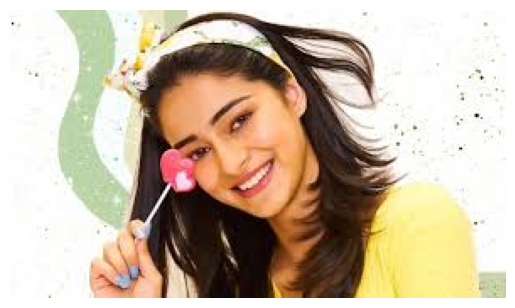

In [29]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

Img1= glob.glob(os.path.join("/content/data/train/straight", "*.jpg"))[1]
img = Image.open(Img1)
plt.imshow(img)
plt.axis('off')
plt.show()

In [30]:
## reshape inputs to standard size
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize((200,200)),
    transforms.ToTensor() #this part takes care of making it RGB, stacking the 3 channels
])

In [ ]:
## make the CNN model from scratch

import torch.nn as nn


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*100*100, 64)  
        #self.sigmoid = nn.Sigmoid() #but maybe be inc with the lossfn
        self.fc2 = nn.Linear(64, 1)  # one neuron output 
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.relu(x1)
        x3 = self.pool(x2)
        x4 = self.flatten(x3)
        x5 = self.fc1(x4)
        x6= self.fc2(x5)
        #x7= self.sigmoid(x6)
        return x6



In [39]:
model = SimpleCNN()

from torchsummary import summary
summary(model, input_size=(3, 200, 200))

# Option 2: Manual counting
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 200, 200]             896
              ReLU-2         [-1, 32, 200, 200]               0
         MaxPool2d-3         [-1, 32, 100, 100]               0
           Flatten-4               [-1, 320000]               0
            Linear-5                   [-1, 64]      20,480,064
            Linear-6                    [-1, 1]              65
Total params: 20,481,025
Trainable params: 20,481,025
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.46
Forward/backward pass size (MB): 24.41
Params size (MB): 78.13
Estimated Total Size (MB): 103.00
----------------------------------------------------------------
Total parameters: 20481025


In [57]:
all_transforms = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ), # ImageNet normalization
    transforms.RandomRotation(50),
    transforms.RandomResizedCrop(200, scale=(0.9, 1.0), ratio=(0.9, 1.1)),
    transforms.RandomHorizontalFlip()
])

In [58]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

train_dataset = ImageFolder(root='/content/data/train', transform=all_transforms)
train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)

validation_dataset = ImageFolder(root='/content/data/test', transform=all_transforms)
validation_loader = DataLoader(validation_dataset, batch_size=20, shuffle=False)

In [59]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.8)
criterion = nn.BCEWithLogitsLoss()  # combines a Sigmoid layer and the BCELoss in one single class
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=320000, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [ ]:
num_epochs = 10
history = {'acc': [], 'loss': [], 'val_acc': [], 'val_loss': []}

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        labels = labels.float().unsqueeze(1) # Ensure labels are float and have shape (batch_size, 1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        # For binary classification with BCEWithLogitsLoss, apply sigmoid to outputs before thresholding for accuracy
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = correct_train / total_train
    history['loss'].append(epoch_loss)
    history['acc'].append(epoch_acc)

    model.eval()
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_epoch_loss = val_running_loss / len(validation_dataset)
    val_epoch_acc = correct_val / total_val
    history['val_loss'].append(val_epoch_loss)
    history['val_acc'].append(val_epoch_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}, "
          f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}")

Epoch 1/10, Loss: 1.0352, Acc: 0.6763, Val Loss: 0.7384, Val Acc: 0.6716
Epoch 2/10, Loss: 0.6207, Acc: 0.7013, Val Loss: 0.5895, Val Acc: 0.7114
Epoch 3/10, Loss: 0.5615, Acc: 0.7188, Val Loss: 0.5518, Val Acc: 0.7264
Epoch 4/10, Loss: 0.5058, Acc: 0.7500, Val Loss: 0.5928, Val Acc: 0.6816
Epoch 5/10, Loss: 0.5216, Acc: 0.7275, Val Loss: 0.5909, Val Acc: 0.6766
Epoch 6/10, Loss: 0.5102, Acc: 0.7625, Val Loss: 0.6769, Val Acc: 0.6318
Epoch 7/10, Loss: 0.5125, Acc: 0.7512, Val Loss: 0.6763, Val Acc: 0.6368
Epoch 8/10, Loss: 0.5044, Acc: 0.7688, Val Loss: 0.5487, Val Acc: 0.7114
Epoch 9/10, Loss: 0.4706, Acc: 0.7837, Val Loss: 0.5935, Val Acc: 0.7413
Epoch 10/10, Loss: 0.4764, Acc: 0.7875, Val Loss: 0.5662, Val Acc: 0.7065


In [56]:
print('training accuracy:', np.median(history['acc']))
print('std of training loss:', np.std(history['loss']))

training accuracy: 1.0
std of training loss: 0.020681221188421153


In [62]:
print('test loss mean:', np.mean(history['val_loss']))
print('mean of last 5 epochs val acc:', np.mean(history['val_acc'][-5:]))

test loss mean: 0.6125074045315607
mean of last 5 epochs val acc: 0.6855721393034826
